<a href="https://colab.research.google.com/github/sooonsyk/ESAA-22-2/blob/main/W1_HW_mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1주차 핸즈온 3장 분류 p.127-154**

##3.1 MNIST
- 고등학생과 미국 인구조사국 직원들이 손으로 쓴 70,000개의 작은 숫자 이미지를 모은 데이터셋

In [2]:
#MNIST 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 데이터셋 설명하는 DESCR키
- 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
- 레이블 배열을 담은 target 키

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


- 이미지가 28*28 픽셀이기 때문에 784개의 특성 가짐
- 개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀의 강도를 나타냄

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [6]:
import numpy as np
some_digit = np.array(X.iloc[0])

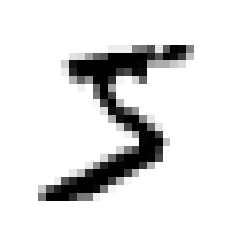

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [8]:
#실제 레이블 확인
y[0]

'5'

In [9]:
#레이블 문자열임, 대부분 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환
y = y.astype(np.int8)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

##3.2 이진 분류기 훈련
- 하나의 숫자만 식별

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

- 사이킷런 SGDClassifier 사용해 확률적 경사 하강법 선택해서 훈련
  - 매우 큰 데이터셋 효율적으로, 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

##3.3 성능 측정

###3.3.1 교차 검증을 사용한 정확도 측정

In [13]:
#가끔 사이킷런이 제공하는 기능보다 교차 검증 과정을 더 많이 제어해야할 필요 있음 - 교차 검증 기능 직접 구현

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


- cross_val_score()함수로 폴드가 3개인 k-겹 교차 검증 사용해 평가

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

- 정확도 높음

In [15]:
#모든 이미지를 5아님 클래스로 분류하는 더미 분류기

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [16]:
#정확도 추측
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

- 0~9 중에 5는 10개 중에 하나 즉 10% 정도이기 때문에 무조건 5 아님으로 예측하면 정확도가 90% 나옴
- 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유, 특히 불균형한 데이터셋을 다룰 때

###3.3.2 오차 행렬
- 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
- 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 함, 테스트 세트로 예측을 만들 수 있지만 여기서 사용하면 안 됨
- 대신 cross_val_predict()함수 사용할 수 있음
  - k-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측 반환함


In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

- 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타냄
- 53892개를 5아님 으로 정확히 분류(진짜음성), 687개를 5라고 잘못 분류(거짓양성), 1891개를 5아님으로 잘못 분류(거짓음성), 3530개를 5라고 정확히 분류(진짜양성)
- 완벽한 분류기라면 오차 행렬의 주대각선만 0이 아닌 값이 됨

In [19]:
#완벽한 분류일 경우
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

- 오차 행렬이 많은 정보를 제공해주지만 더 요약된 지표 필요할 때 있음
- 양성 예측의 정확도 -> 정밀도 = 진짜 양성의 수/(진짜 양성의 수 + 거짓 양성의 수)
  - 재현율과 같이 사용
- 재현율 - 분류기가 정확하게 감지한 양성 샘플의 비율, 민감도, 진짜 양성 비율 = 진짜 양성의 수 / (진짜 양성의 수 + 거짓 음성의 수)

#3.3.3 정밀도와 재현율


In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

- 정밀도와 재현율을 F1 점수라고 하는 하나의 숫자로 만들면 편리할 때 많음, 특히 두 분류기 비교할 때
- F1 점수 - 정밀도와 재현율의 조화 평균

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

- 정밀도와 재현율이 비슷한 분류기에서는 F1 점수 높지만 항상 바람직하지 않음, 상황에 따라 중요한 게 달라짐
- 그렇지만 둘을 모두 얻을 수 없음 - 정밀도/재현율 트레이드오프

###3.3.4 정밀도/재현율 트레이드오프
- SBDClassifier는 결정함수를 사용해서 각 샘플의 점수를 계산함, 이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당
- 사이킷런에서 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있음
- predict() 대신 decision_fuction() 메서드 호출하면 각 샘플의 점수 얻을 수 있음

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

In [28]:
threshold = 0
y_some_digit_pred = ( y_scores > threshold)
y_some_digit_pred

array([ True])

- SGDClassifier의 임곗값이 0 이므로 predict()와 같은 결과

In [29]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

- 임곗값을 높이면 재현율이 줄어듦
- 적절한 임곗값을 정하려면 cross_val_predict() 함수 사용해 훈련 세트에 있는 모든 샘플의 점수 구해야 함, 예측 결과가 아니라 결정 점수를 반환하도록 지정

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [31]:
#가능한 모든 임곗값에 대해 정밀도와 재현율 계산

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

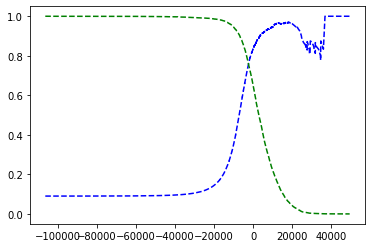

In [32]:
#맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율 그릴 수 있음

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
  plt.plot(thresholds, recalls[:-1],"g--", label="재현율")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

- 재현율 80% 근처에서 정밀도가 급격하게 줄어듦, 이 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음

In [34]:
#정밀도 90% 달성이 목표, 최소한 정밀도가 90%가 되는 가장 낮은 임곗값 찾을 수 있음
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [35]:
#훈련 세트에 대한 예측 만듦
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

###3.3.5 ROC 곡선
- 수신기 조작 특성 곡선
- 거짓 양성 비율에 대한 진짜 양성 비율 = 1에서 진짜 음성 비율 뺀 값(특이도)

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

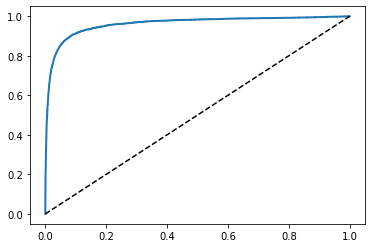

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr, tpr)
plt.show()

- 재현율이 높을수록 거짓 양성이 늘어남
- 점선은 완전한 랜덤 분류기의 ROC 곡선, 좋은 분류기는 점선에서 최대한 멀리 떨어져있어야 함(왼쪽 위 모서리)
- 곡선 아래의 면적 AUC를 측정하면 분류기들 비교 가능, 완벽한 경우 1, 완전한 경우 0.5

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [42]:
#RandomForestClassifier 훈련 시켜서

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba') #RandomForestClassifier에는 decision_fuction() 대신 predict_proba()

In [43]:
y_scores_forest = y_probas_forest[:,1] # 양성 클래스 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

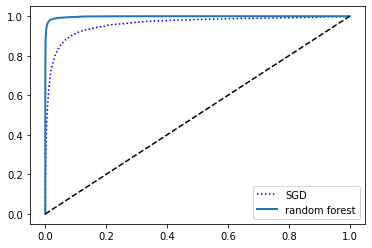

In [45]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc='lower right')
plt.show()

In [46]:
#random forest 가 더 좋아보임
#roc_auc 점수도
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

##3.4 다중 분류
- 둘 이상의 클래스 분류
- 이진 분류 여러개 사용하는 방법도 있음
  - OvR 전략 : 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택, OvA
  - OvO 전략 : 각 숫자의 조합 마다 이진 분류기 훈련

In [47]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #y_train_5 아니고 y_train 사용
svm_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=int8)

- 정확히 맞춤
- decision_fuction()메서드 호출하면 샘플 당 10개의 점수 반환, 클래스 마다 하나
- 가장 높은 점수가 클래스 5에 해당하는 값

In [48]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [49]:
np.argmax(some_digit_scores)

5

In [50]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [51]:
svm_clf.classes_[5]

5

- 사이킷런에서 OvO 나 OvR을 사용하도록 강제하려면 OneVsOneClassifier 나 OneVsRestClassifier 사용

In [52]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

NameError: ignored

In [54]:
len(ovr_clf.estimators_)

10

- SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도록 OvR이나 OvO 적용할 필요 없음

In [55]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int8)

In [56]:
sgd_clf.decision_function([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

- 대부분 큰 음수인데 클래스 5는 큰 양수 - 강한 확신

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [58]:
#간단하게 입력 스케일 조정하면 정확도 높일 수 있음
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [1]:
y_train_pred = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

NameError: ignored

- 맷플롯립의 matshow() 함수 사용해 이미지로 표현하면 보기 편리한 경우 많음

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

- 숫자 5는 다른 숫자보다 어두워 보임 - 숫자 5의 이미지가 적거나, 숫자5를 다른 숫자만큼 잘 분류하지 못함을 의미, 둘 다 확인해봐야 함
- 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율 비교

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [ ]:
#주대각선만 0으로 채워서 그래프 그림
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 행은 실제 클래스, 열은 예측한 클래스
- 클래스 8의 열 상당히 밝음 - 많은 이미지가 잘못 분류됐음을 암시, 그렇지만 행은 나쁘지 않음
  -> 실제로 8이 적절히 8로 분류되었음 의미
- 오차 행렬은 항상 대칭인 것이 아님
- 오차 행렬 분석하면 성능 향상 방안에 대한 통찰 얻을 수 잇음
- 개개의 에러를 분석해보면 분류기가 무슨 일을 하고, 왜 잘못되었는지에 대해 통찰을 얻을 수 있지만 더 어렵고 시간이 많이 걸림

##3.6 다중 레이블 분류
- 분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때
- 여러 개의 이진 꼬리표를 출력하는 분류 시스템

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

- 각 숫자 이미지에 두 개의 타깃 레이블이 담긴 y_multilabel 배열 만듦
  - 첫번째는 큰 값인지, 두번째는 홀수인지 나타냄

In [ ]:
knn_clf.predict([some_digit])

- 평가 지표 다양

In [ ]:
#F1 점수 평균
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

##3.7 다중 출력 분류
- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것, 값을 두 개 이상 가질 수 있음
- 이미지에서 잡음을 제거하는 시스템
  - 잡음이 많은 숫자 이미지를 입력으로 받고 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열로 출력
  - 분류기의 출력이 다중 레이블(픽셀당 한 레이블)이고 각 레이블은 값을 여러개 가짐(0부터 255까지 픽셀 강도)

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)